In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
train_path=r'C:\Users\naman\OneDrive\Documents\Python_Projects\ML\Datasets\Dataset\Train'
validation_path=r'C:\Users\naman\OneDrive\Documents\Python_Projects\ML\Datasets\Dataset\Test'

In [3]:
image_size=[224,224]

In [4]:
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from keras.layers import Flatten,Dense

In [6]:
from keras.applications import VGG16

In [7]:
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [8]:
for layer in vgg.layers:
    layer.trainable=False

In [9]:
from glob import glob

In [10]:
folders=glob(r'C:\Users\naman\OneDrive\Documents\Python_Projects\ML\Datasets\Dataset\Train\*')

In [11]:
len(folders)

2

In [12]:
from keras.applications.vgg16 import preprocess_input

In [13]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from keras.layers import MaxPooling2D,BatchNormalization

In [15]:
classifier=keras.Sequential([
    
    keras.layers.Conv2D(filters=32,
    kernel_size=2,
    padding='same',
    activation='relu',
    input_shape=(224,224,3)),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64,
    kernel_size=2,
    padding='same',
    activation='relu'),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128,
    kernel_size=2,
    padding='same',
    activation='relu'),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(units=500,activation='relu'),
    
    keras.layers.Dense(units=2,activation='softmax')
    
    ])

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      416       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      8256      
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                        

In [17]:
classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                channel_shift_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True)

validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    channel_shift_range=0.2,
                                    fill_mode='nearest',
                                    horizontal_flip=True)

In [19]:
train_ds=train_datagen.flow_from_directory(directory=train_path,
                                           target_size=(224, 224),
                                           class_mode='categorical',
                                           batch_size=32)

validation_ds=validation_datagen.flow_from_directory(directory=validation_path,
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=32)

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [20]:
model_history=classifier.fit(train_ds,validation_data=validation_ds,epochs=20)

Epoch 1/20


13/13 [==============================] - 23s 2s/step - loss: 26.5931 - accuracy: 0.6034 - val_loss: 0.6506 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 18s 1s/step - loss: 0.7686 - accuracy: 0.6587 - val_loss: 0.6775 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 16s 1s/step - loss: 0.5664 - accuracy: 0.7115 - val_loss: 0.6102 - val_accuracy: 0.6791
Epoch 4/20
13/13 [==============================] - 16s 1s/step - loss: 0.5393 - accuracy: 0.7452 - val_loss: 0.6776 - val_accuracy: 0.6791
Epoch 5/20
13/13 [==============================] - 16s 1s/step - loss: 0.4469 - accuracy: 0.7861 - val_loss: 0.5936 - val_accuracy: 0.6791
Epoch 6/20
13/13 [==============================] - 16s 1s/step - loss: 0.6445 - accuracy: 0.8053 - val_loss: 0.5722 - val_accuracy: 0.6791
Epoch 7/20
13/13 [==============================] - 16s 1s/step - loss: 0.4848 - accuracy: 0.8029 - val_loss: 0.6365 - val_accuracy: 0.6791
Epoch 8/20
13/13 

In [21]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
import matplotlib.pyplot as plt

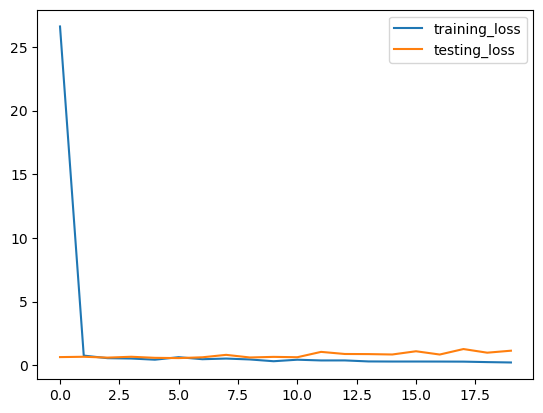

In [23]:
plt.plot(model_history.history['loss'],label='training_loss')
plt.plot(model_history.history['val_loss'],label='testing_loss')
plt.legend()
plt.show()

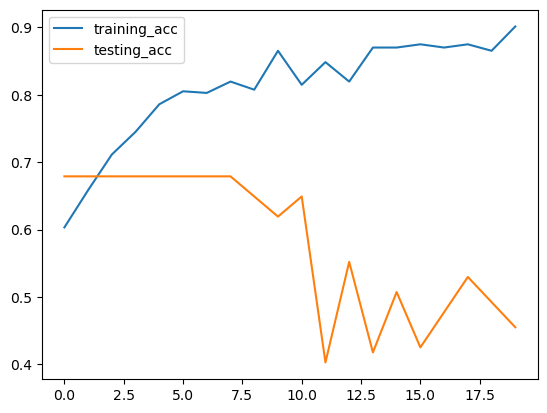

In [24]:
plt.plot(model_history.history['accuracy'],label='training_acc')
plt.plot(model_history.history['val_accuracy'],label='testing_acc')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.models import load_model

In [26]:
classifier.save('model_vgg16.h5')

C:\Users\naman\OneDrive\Documents\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
y_pred=classifier.predict(validation_ds)

5/5 [==============================] - 2s 341ms/step


In [28]:
y_pred

array([[0.37031657, 0.6296835 ],
       [0.05571725, 0.94428277],
       [0.5466609 , 0.4533391 ],
       [0.5073905 , 0.49260956],
       [0.7508655 , 0.24913448],
       [0.50120014, 0.4987998 ],
       [0.13982803, 0.860172  ],
       [0.43289533, 0.56710464],
       [0.24705265, 0.7529474 ],
       [0.5900374 , 0.40996253],
       [0.26230475, 0.7376952 ],
       [0.09494233, 0.9050576 ],
       [0.05848225, 0.9415178 ],
       [0.34937102, 0.650629  ],
       [0.69533247, 0.30466753],
       [0.5240409 , 0.47595915],
       [0.8520868 , 0.14791319],
       [0.7281223 , 0.27187774],
       [0.40593734, 0.5940627 ],
       [0.14064457, 0.8593554 ],
       [0.50120014, 0.4987998 ],
       [0.13866858, 0.8613314 ],
       [0.70644355, 0.29355645],
       [0.3320224 , 0.6679776 ],
       [0.07191737, 0.9280826 ],
       [0.5834216 , 0.41657847],
       [0.39110604, 0.608894  ],
       [0.48580447, 0.5141955 ],
       [0.5218434 , 0.47815666],
       [0.5290171 , 0.47098297],
       [0.

In [29]:
import numpy as np

In [30]:
y_pred=np.argmax(y_pred,axis=1)#get the highest index from y_pred(whichever is highest is parasite(0-infected,1-not infected))

In [31]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_vgg16.h5')

In [34]:
uninfected_img=image.load_img(r'C:\Users\naman\OneDrive\Documents\Python_Projects\ML\Datasets\Dataset\Train\Uninfected\C1_thinF_IMG_20150604_104722_cell_164.png',target_size=(224,224))

In [35]:
parasite_img=image.load_img(r'C:\Users\naman\OneDrive\Documents\Python_Projects\ML\Datasets\Dataset\Train\Parasite\C33P1thinF_IMG_20150619_121229a_cell_179.png',target_size=(224,224))

In [44]:
x=image.img_to_array(parasite_img)

In [45]:
x=x/255

In [46]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [47]:
x.shape

(224, 224, 3)

In [48]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

1/1 [==============================] - 0s 32ms/step


array([[0.00453543, 0.9954646 ]], dtype=float32)

In [50]:
categories=['Parasite','Uninfected']

In [51]:
pred_name=categories[np.argmax(model.predict(img_data))]
pred_name

1/1 [==============================] - 0s 32ms/step


'Uninfected'